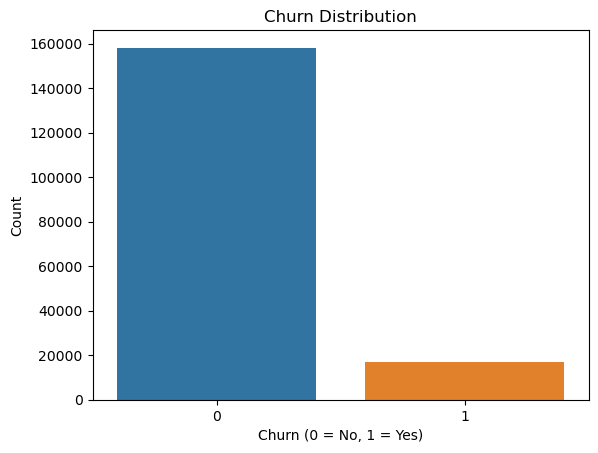

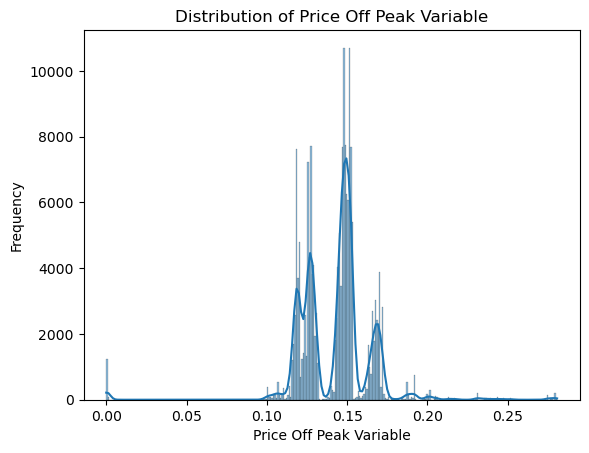

           cons_12m  cons_gas_12m  cons_last_month  forecast_cons_12m  \
count  1.751490e+05  1.751490e+05    175149.000000      175149.000000   
mean   1.592606e+05  2.808072e+04     16095.518404        1868.343884   
std    5.735413e+05  1.629400e+05     64376.741908        2387.560169   
min    0.000000e+00  0.000000e+00         0.000000           0.000000   
25%    5.674000e+03  0.000000e+00         0.000000         494.980000   
50%    1.411500e+04  0.000000e+00       792.000000        1112.610000   
75%    4.076300e+04  0.000000e+00      3383.000000        2400.350000   
max    6.207104e+06  4.154590e+06    771203.000000       82902.830000   

       forecast_cons_year  forecast_discount_energy  forecast_meter_rent_12m  \
count       175149.000000             175149.000000            175149.000000   
mean          1399.782380                  0.967028                63.074649   
std           3248.331276                  5.109025                66.143996   
min              0.000

In [27]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load data
client_data = pd.read_csv('4.1 Client Data.csv')
price_data = pd.read_csv('4.2 Price Data.csv')

# Merge datasets
merged_data = pd.merge(client_data, price_data, on='id', how='inner')

# Numerical summary
numerical_summary = merged_data.describe()

# Churn distribution
sns.countplot(x='churn', data=merged_data)
plt.title('Churn Distribution')
plt.xlabel('Churn (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()

# Visualize distribution of price_off_peak_var
sns.histplot(merged_data['price_off_peak_var'], kde=True)
plt.title('Distribution of Price Off Peak Variable')
plt.xlabel('Price Off Peak Variable')
plt.ylabel('Frequency')
plt.show()

# Output summary
print(numerical_summary)


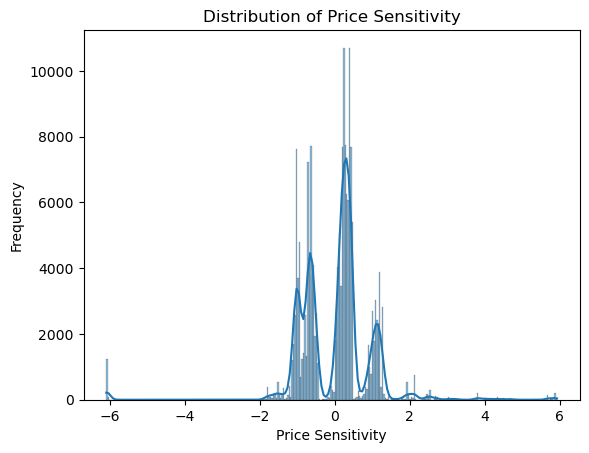

In [4]:
# Define price sensitivity
merged_data['price_sensitivity'] = (
    merged_data['price_off_peak_var'] - merged_data['price_off_peak_var'].mean()
) / merged_data['price_off_peak_var'].std()

# Visualize price sensitivity
sns.histplot(merged_data['price_sensitivity'], kde=True)
plt.title('Distribution of Price Sensitivity')
plt.xlabel('Price Sensitivity')
plt.ylabel('Frequency')
plt.show()


In [5]:
from scipy.stats import pointbiserialr

# Correlation between price sensitivity and churn
correlation, p_value = pointbiserialr(merged_data['price_sensitivity'], merged_data['churn'])
print(f'Correlation: {correlation}, p-value: {p_value}')


Correlation: -0.006075086109075357, p-value: 0.011006957978144851


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_19748\1596864262.py:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = merged_data.corr()


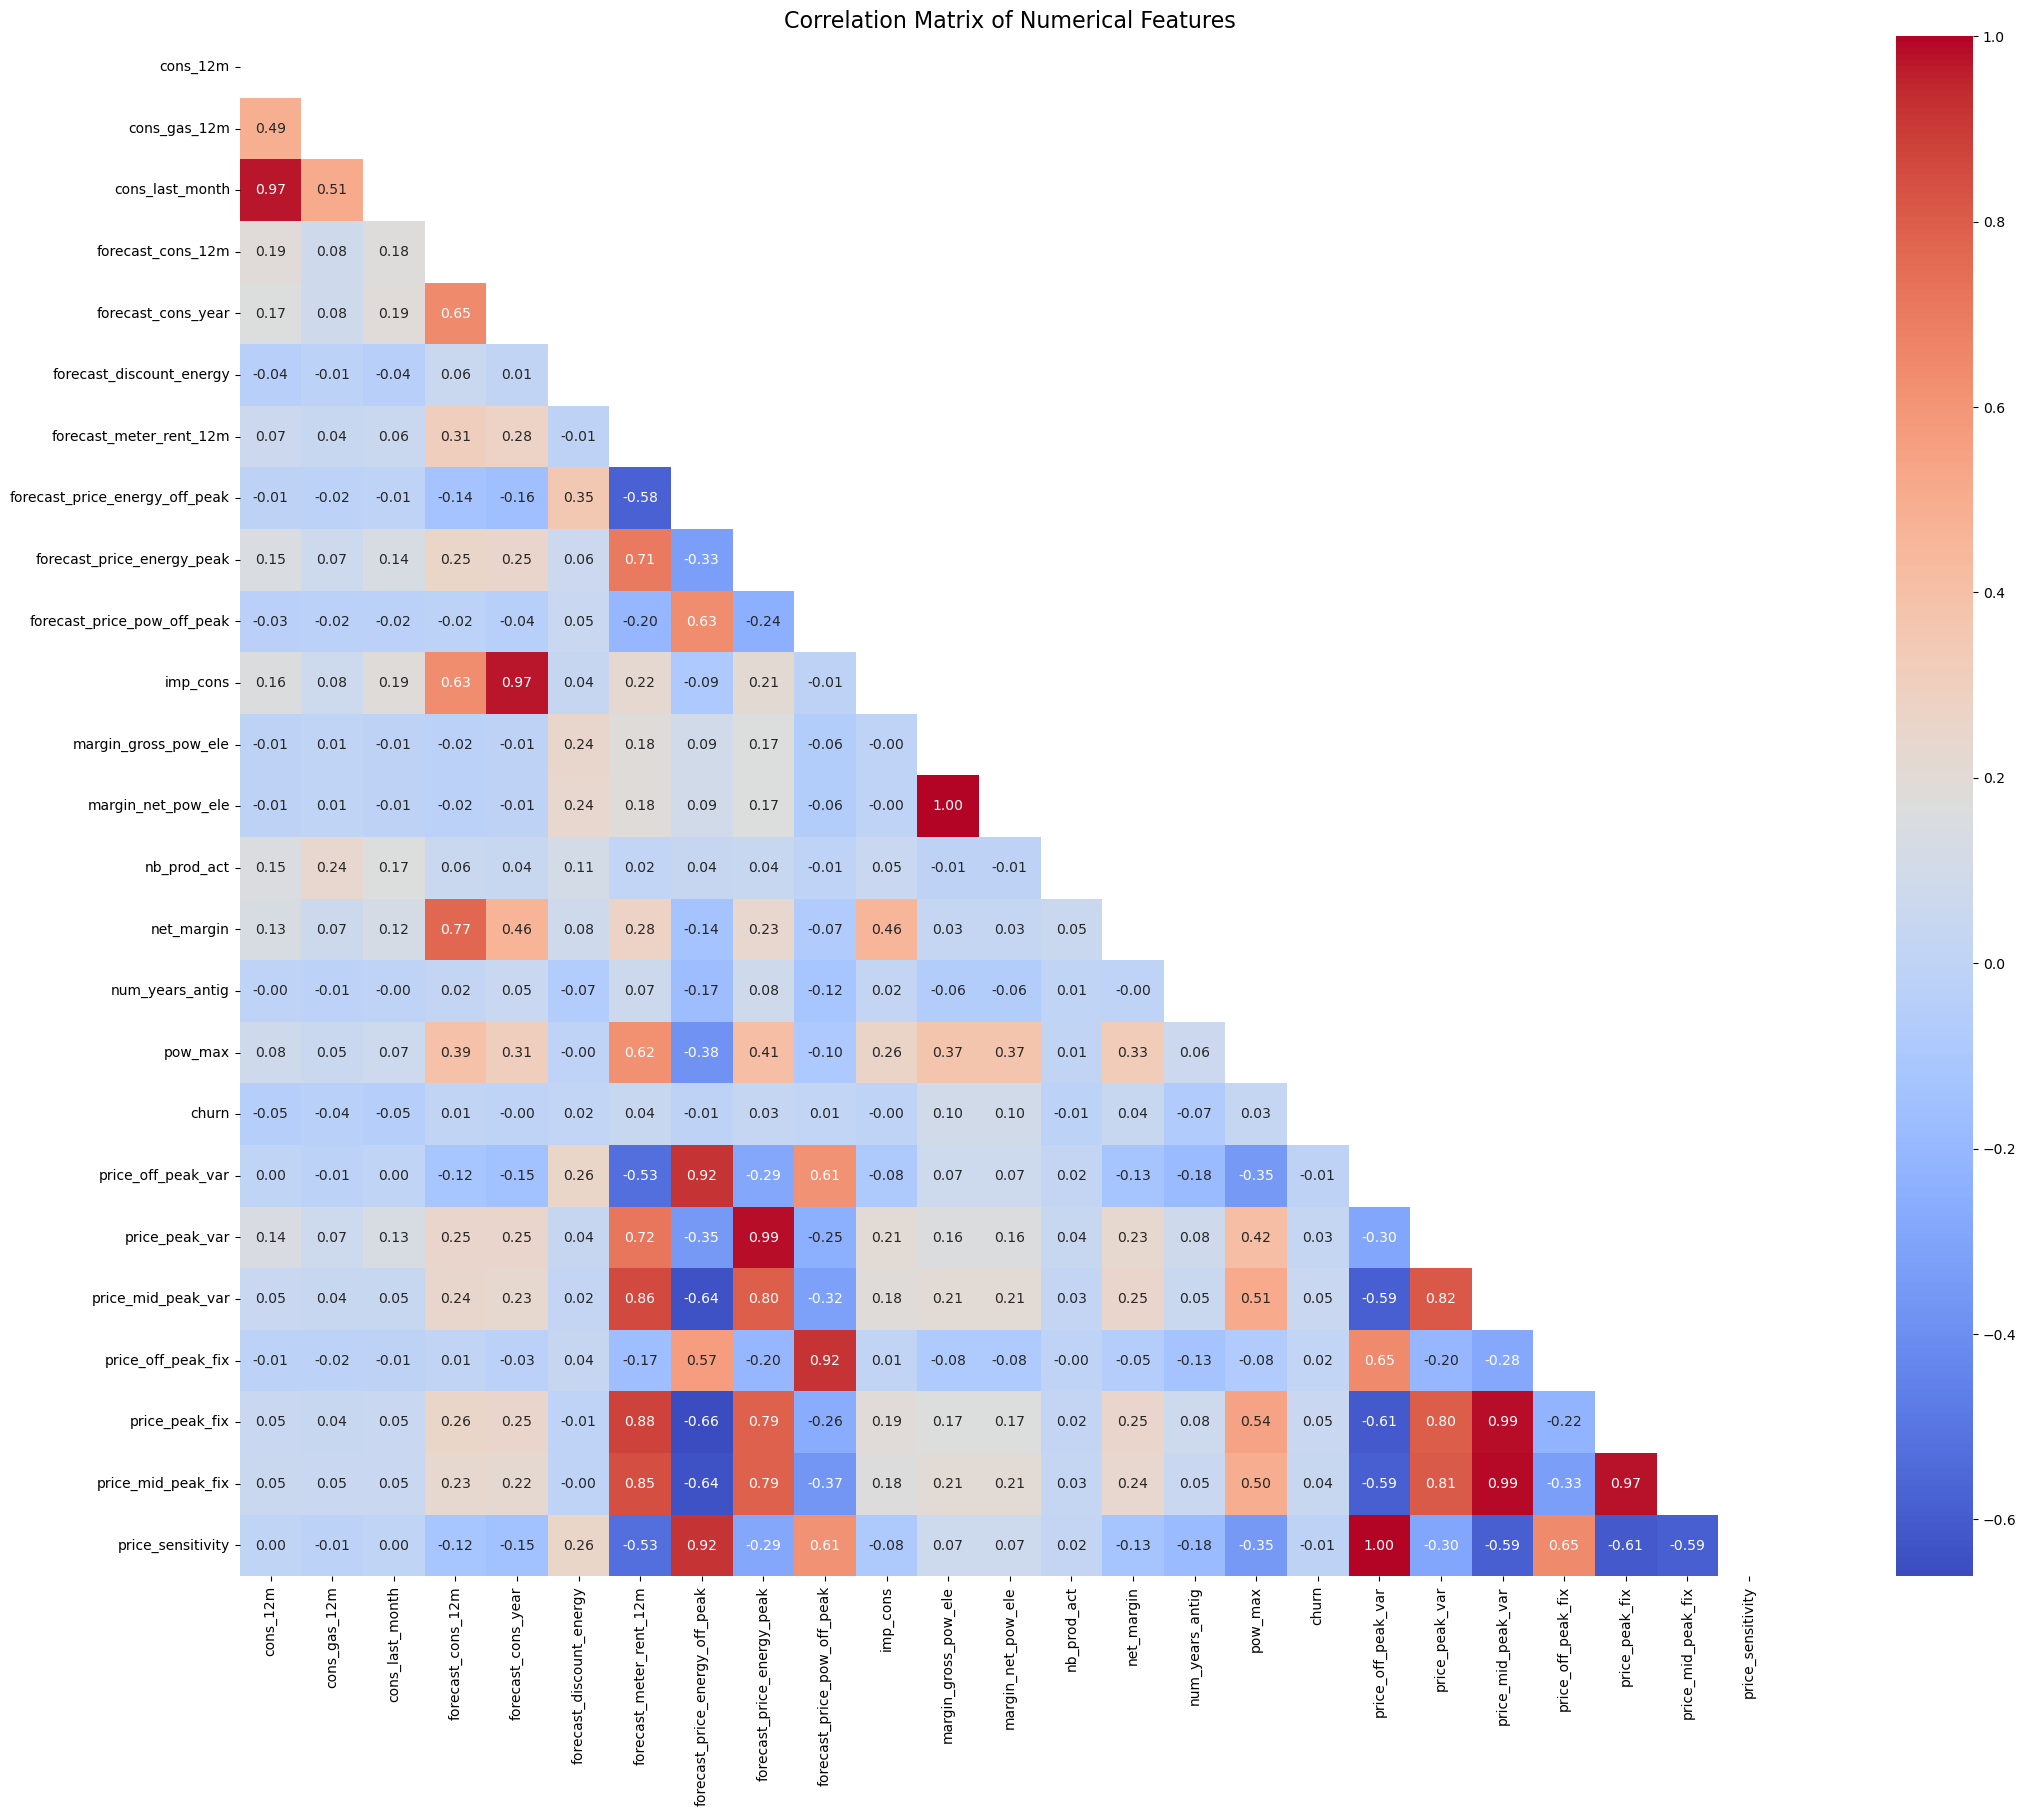

In [8]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the correlation matrix for numerical features
correlation_matrix = merged_data.corr()

# Set up the matplotlib figure
plt.figure(figsize=(20, 10))

# Draw the heatmap
sns.heatmap(
    correlation_matrix,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    cbar=True,
    square=True,
    mask=np.triu(np.ones_like(correlation_matrix, dtype=bool))
)

plt.title("Correlation Matrix of Numerical Features", fontsize=16)
plt.show()


Mean Squared Error: 0.08544940967461523
R-squared: 0.005350807871066565


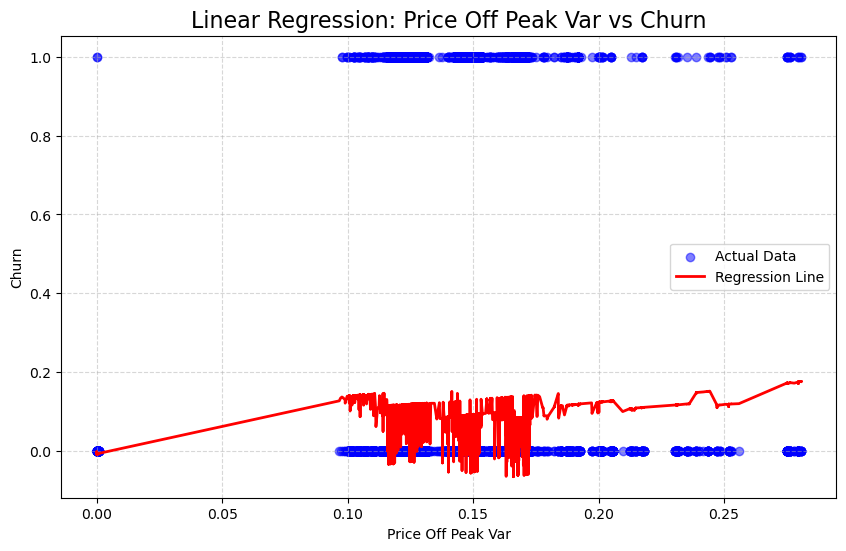

In [25]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Merge Client and Price Data
merged_data = pd.merge(client_data, price_data, on='id', how='inner')

# Step 2: Feature Selection
# Selecting features related to pricing and client consumption
features = [
    'price_off_peak_var', 'price_peak_var', 'price_off_peak_fix', 
    'price_peak_fix', 'cons_12m', 'cons_last_month'
]
X = merged_data[features]  # Independent variables
y = merged_data['churn']   # Dependent variable (target)

# Step 3: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Linear Regression Model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Step 5: Predictions and Evaluation
y_pred = linear_model.predict(X_test)

# Calculate Mean Squared Error and R-squared
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

# Step 6: Visualizing Regression Line for One Feature (e.g., price_off_peak_var)
plt.figure(figsize=(10, 6))

# Scatter plot of actual data
plt.scatter(X_test['price_off_peak_var'], y_test, color='blue', alpha=0.5, label='Actual Data')

# Regression line
# Sort the data to ensure a smooth regression line
sorted_indices = np.argsort(X_test['price_off_peak_var'])
sorted_X = X_test['price_off_peak_var'].iloc[sorted_indices]
sorted_y_pred = y_pred[sorted_indices]

plt.plot(sorted_X, sorted_y_pred, color='red', linewidth=2, label='Regression Line')

plt.title('Linear Regression: Price Off Peak Var vs Churn', fontsize=16)
plt.xlabel('Price Off Peak Var')
plt.ylabel('Churn')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()
